In [1]:
import numpy
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

Eigenvalue problem
==================

Matrix transformaion is written as

$$ \mathbf{y} = A\mathbf{x} $$

A different vector in the same direction can be written as scalar multiplication:

$$\mathbf{y} = \lambda\mathbf{x}$$ 

Equating these $y$s yields:

$$ A\mathbf{x} = \lambda \mathbf{x} \Rightarrow (A - \lambda I) \mathbf{x} = 0$$

$$\det(A - \lambda I) = 0 $$

The eigenvalue problem can also be collected with $\Lambda$ being a diagonal matrix containing all the eigenvalues and $X$ containing the eigenvectors stacked column-wise. This leads to the eigenvalue decomposition:

$$  A X = X \Lambda \Rightarrow A = X \Lambda X^{-1}$$

If we try to find a similar decomposition with different constraints, we can write

$$ A = U D V^{H} $$

If $D$ is a diagonal matrix and $U$ and $V$ are [unitary](http://en.wikipedia.org/wiki/Unitary_matrix), this is the singular value decomposition.

In [6]:
from ipywidgets import interact

In [7]:
def plotvector(x, color='blue'):
    plt.plot([0, x[0,0]], [0, x[1,0]], color=color)

In [8]:
import matplotlib.patches as patches

Let's investigate the properties of this matrix:

In [9]:
A = numpy.matrix([[1, 4],
                  [3, 2]])

The eigenvectors and eigenvalues can be calculated as follows. We also calculate the output vectors associated with a unit vector input in the eigenvector directions.

In [10]:
lambdas, eigvectors = numpy.linalg.eig(A)
ev1 = lambdas[0]*eigvectors[:, 0]
ev2 = lambdas[1]*eigvectors[:, 1]

The singular values determine the main axes of the translation ellipse of the matrix. Note that the `numpy.linalg.svd` function returns the conjugate transpose of the input direction matrix.

In [11]:
U, S, VH = numpy.linalg.svd(A)
V = VH.H
ellipseangle = numpy.rad2deg(numpy.angle(complex(*U[:, 0])))

<function __main__.interactive>

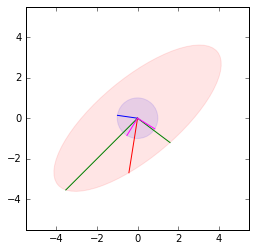

In [12]:
def interactive(scale, theta):
    x = numpy.matrix([[numpy.cos(theta)], [numpy.sin(theta)]])
    y = A*x

    plotvector(x)
    plotvector(y, color='red')
    plotvector(ev1, 'green')
    plotvector(ev2, 'green')
    plotvector(V[:, 0], 'magenta')
    plotvector(V[:, 1], 'magenta')
    plt.gca().add_artist(patches.Circle([0, 0], 1, 
                                        color='blue', 
                                        alpha=0.1))
    plt.gca().add_artist(patches.Ellipse([0, 0], S[0]*2, S[1]*2, 
                                         ellipseangle,
                                         color='red',
                                         alpha=0.1))
    plt.axis([-scale, scale, -scale, scale])
    plt.axes().set_aspect('equal')
interact(interactive, scale=[1., 10], theta=[0, numpy.pi*2])